# Question 1: Sampling and central limit

----------------------------------------

## Ali Borzoozadeh: 810102410

-----------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(410)

### Part 1:

----------

| Distribution | Parameter | Mean             | Variance           |
|--------------|-----------|------------------|--------------------|
| Poisson      | $\lambda$ | $\lambda$        | $\lambda$          |
| Exponential  | $\lambda$ | $\frac{1}{\lambda}$ | $\frac{1}{\lambda^2}$ |
| Geometric    | $p$       | $\frac{1}{p}$     | $\frac{1-p}{p^2}$   |

Now according to the question values:

| Distribution |  Parameter  | Mean             | Variance           |
|--------------|-------------|------------------|--------------------|
| Poisson      |     $10$    |       $10$       |       $10$         |
| Exponential  |$\frac{1}{2}$|       $2$        |       $4$          |
| Geometric    |$\frac{1}{5}$|       $5$        |       $20$         |

### Part 2:

-----------

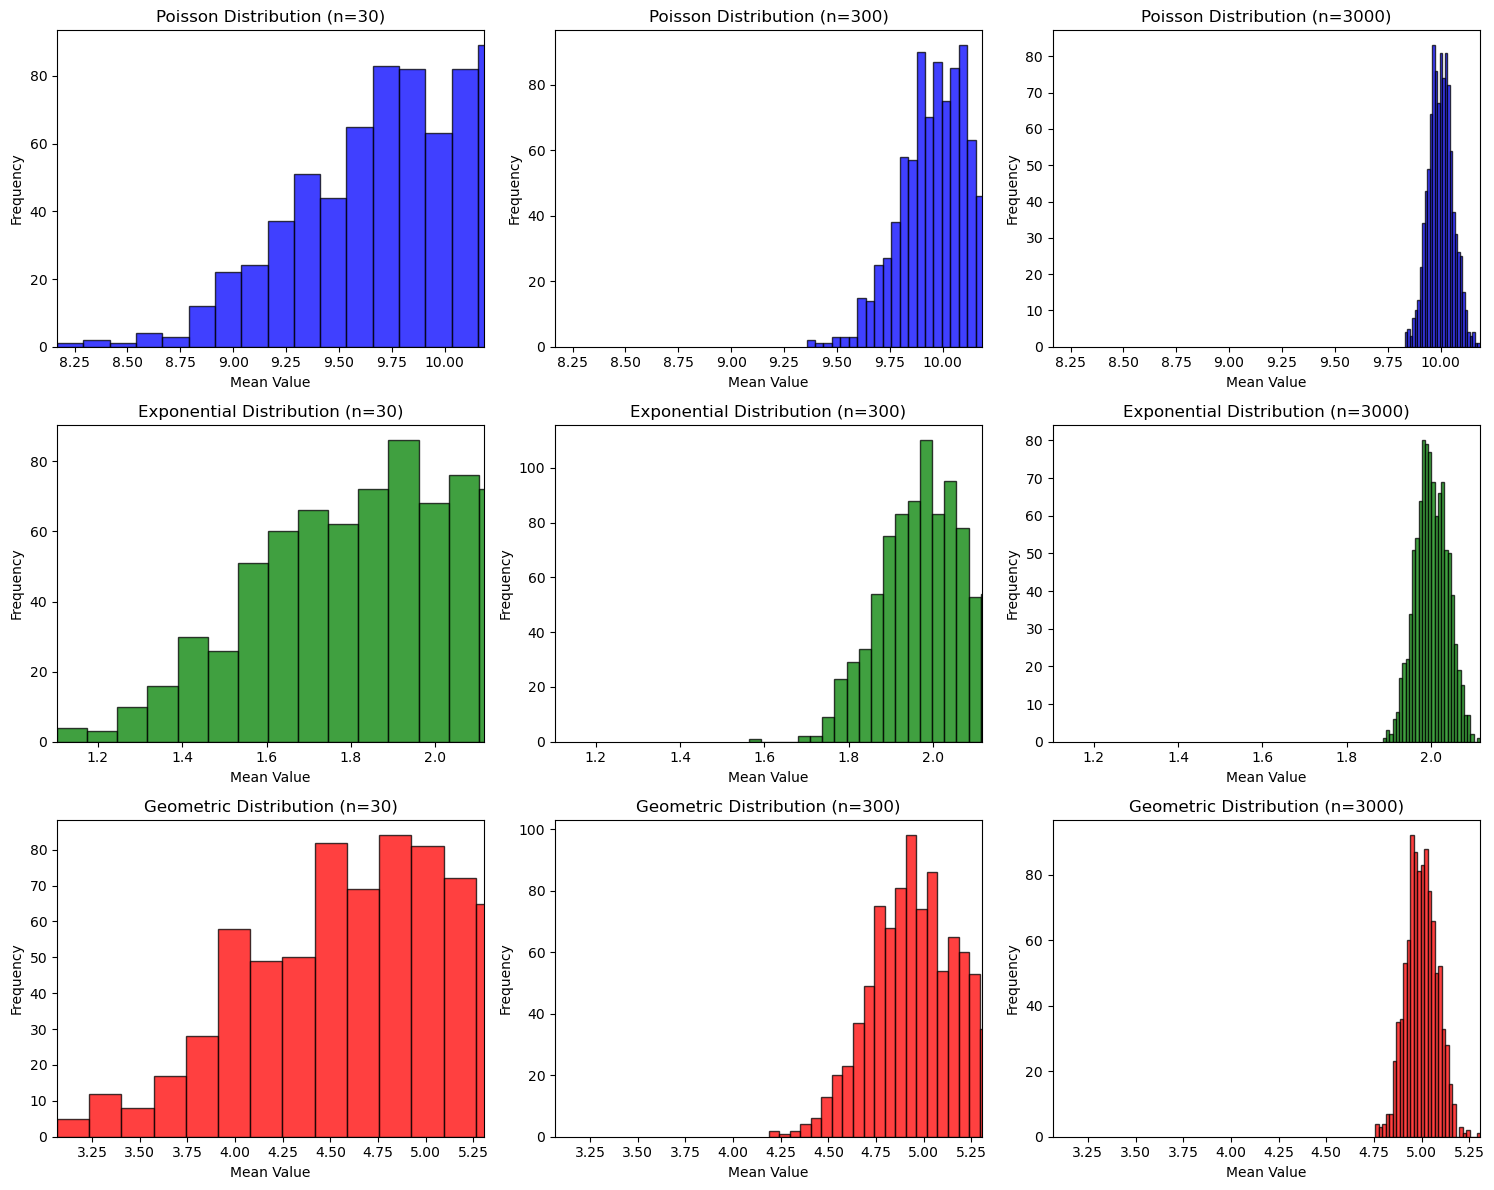

In [2]:
poisson_lambda = 10
exponential_lambda = 1 / 2
geometric_p = 1 / 5

sample_sizes = [30, 300, 3000]
num_samples = 1000

def generate_sample_means(dist, param, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        if dist == 'poisson':
            samples = np.random.poisson(param, sample_size)
        elif dist == 'exponential':
            samples = np.random.exponential(1/param, sample_size)
        elif dist == 'geometric':
            samples = np.random.geometric(param, sample_size)
        sample_means.append(np.mean(samples))
    return sample_means
    
poisson_means = {size: generate_sample_means('poisson', poisson_lambda, size, num_samples) for size in sample_sizes}
exponential_means = {size: generate_sample_means('exponential', exponential_lambda, size, num_samples) for size in sample_sizes}
geometric_means = {size: generate_sample_means('geometric', geometric_p, size, num_samples) for size in sample_sizes}

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, size in enumerate(sample_sizes):
    axs[0, i].hist(poisson_means[size], bins=30, alpha=0.75, color='blue', edgecolor='black')
    axs[0, i].set_title(f'Poisson Distribution (n={size})')
    axs[0, i].set_xlim([min(poisson_means[30]), max(poisson_means[3000])])
    axs[0, i].set_xlabel('Mean Value')
    axs[0, i].set_ylabel('Frequency')

    axs[1, i].hist(exponential_means[size], bins=30, alpha=0.75, color='green', edgecolor='black')
    axs[1, i].set_title(f'Exponential Distribution (n={size})')
    axs[1, i].set_xlim([min(exponential_means[30]), max(exponential_means[3000])])
    axs[1, i].set_xlabel('Mean Value')
    axs[1, i].set_ylabel('Frequency')

    axs[2, i].hist(geometric_means[size], bins=30, alpha=0.75, color='red', edgecolor='black')
    axs[2, i].set_title(f'Geometric Distribution (n={size})')
    axs[2, i].set_xlim([min(geometric_means[30]), max(geometric_means[3000])])
    axs[2, i].set_xlabel('Mean Value')
    axs[2, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Part 3:

-----------

In [3]:
def calculate_statistics(sample_means):
    mean = np.mean(sample_means)
    standard_deviation = np.std(sample_means)
    return mean, standard_deviation

for size in sample_sizes:
    poisson_mean, poisson_std = calculate_statistics(poisson_means[size])
    exponential_mean, exponential_std = calculate_statistics(exponential_means[size])
    geometric_mean, geometric_std = calculate_statistics(geometric_means[size])
    
    print(f"Sample Size: {size}")
    print(f"Poisson Distribution - Mean: {poisson_mean:.4f}, Standard Deviation: {poisson_std:.4f}")
    print(f"Exponential Distribution - Mean: {exponential_mean:.4f}, Standard Deviation: {exponential_std:.4f}")
    print(f"Geometric Distribution - Mean: {geometric_mean:.4f}, Standard Deviation: {geometric_std:.4f}")
    print()

Sample Size: 30
Poisson Distribution - Mean: 10.0238, Standard Deviation: 0.5781
Exponential Distribution - Mean: 1.9865, Standard Deviation: 0.3495
Geometric Distribution - Mean: 5.0535, Standard Deviation: 0.8395

Sample Size: 300
Poisson Distribution - Mean: 9.9961, Standard Deviation: 0.1835
Exponential Distribution - Mean: 2.0021, Standard Deviation: 0.1202
Geometric Distribution - Mean: 4.9929, Standard Deviation: 0.2614

Sample Size: 3000
Poisson Distribution - Mean: 9.9987, Standard Deviation: 0.0584
Exponential Distribution - Mean: 2.0005, Standard Deviation: 0.0379
Geometric Distribution - Mean: 4.9972, Standard Deviation: 0.0807



#### As is clear, in all three cases, as the sample size increases, the mean value becomes closer to the theoretical value and the standard deviation also decreases.

### Part 4:

-----------

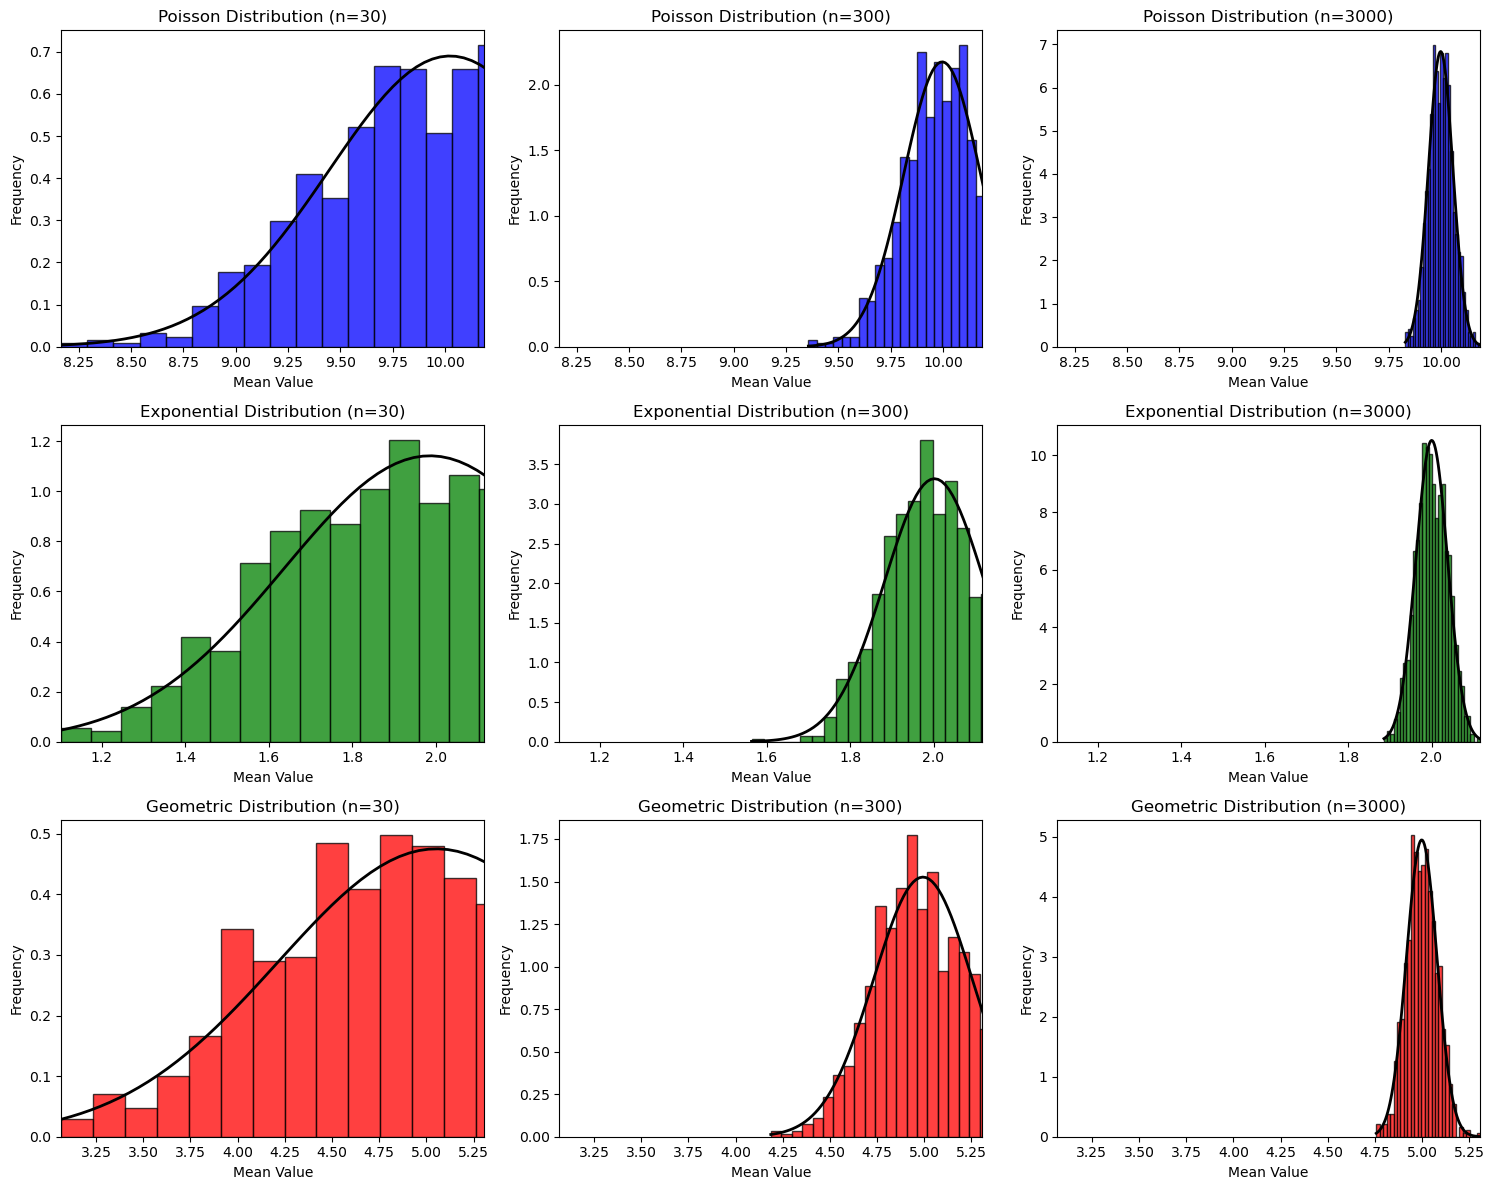

In [4]:
from scipy.stats import norm

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for i, size in enumerate(sample_sizes):
    poisson_mean, poisson_std = calculate_statistics(poisson_means[size])
    exponential_mean, exponential_std = calculate_statistics(exponential_means[size])
    geometric_mean, geometric_std = calculate_statistics(geometric_means[size])
    
    x = np.linspace(min(poisson_means[size]), max(poisson_means[size]), 100)
    axs[0, i].hist(poisson_means[size], bins=30, alpha=0.75, color='blue', edgecolor='black', density=True)
    axs[0, i].plot(x, norm.pdf(x, poisson_mean, poisson_std), 'k-', linewidth=2)
    axs[0, i].set_title(f'Poisson Distribution (n={size})')
    axs[0, i].set_xlim([min(poisson_means[30]), max(poisson_means[3000])])
    axs[0, i].set_xlabel('Mean Value')
    axs[0, i].set_ylabel('Frequency')
    
    x = np.linspace(min(exponential_means[size]), max(exponential_means[size]), 100)
    axs[1, i].hist(exponential_means[size], bins=30, alpha=0.75, color='green', edgecolor='black', density=True)
    axs[1, i].plot(x, norm.pdf(x, exponential_mean, exponential_std), 'k-', linewidth=2)
    axs[1, i].set_title(f'Exponential Distribution (n={size})')
    axs[1, i].set_xlim([min(exponential_means[30]), max(exponential_means[3000])])
    axs[1, i].set_xlabel('Mean Value')
    axs[1, i].set_ylabel('Frequency')
    
    x = np.linspace(min(geometric_means[size]), max(geometric_means[size]), 100)
    axs[2, i].hist(geometric_means[size], bins=30, alpha=0.75, color='red', edgecolor='black', density=True)
    axs[2, i].plot(x, norm.pdf(x, geometric_mean, geometric_std), 'k-', linewidth=2)
    axs[2, i].set_title(f'Geometric Distribution (n={size})')
    axs[2, i].set_xlim([min(geometric_means[30]), max(geometric_means[3000])])
    axs[2, i].set_xlabel('Mean Value')
    axs[2, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### As we can see, the larger the sample size, the closer we get to a normal distribution with lower variance, and the mean of the normal distribution becomes closer to the mean of the original distribution.

### Part 5:

-----------

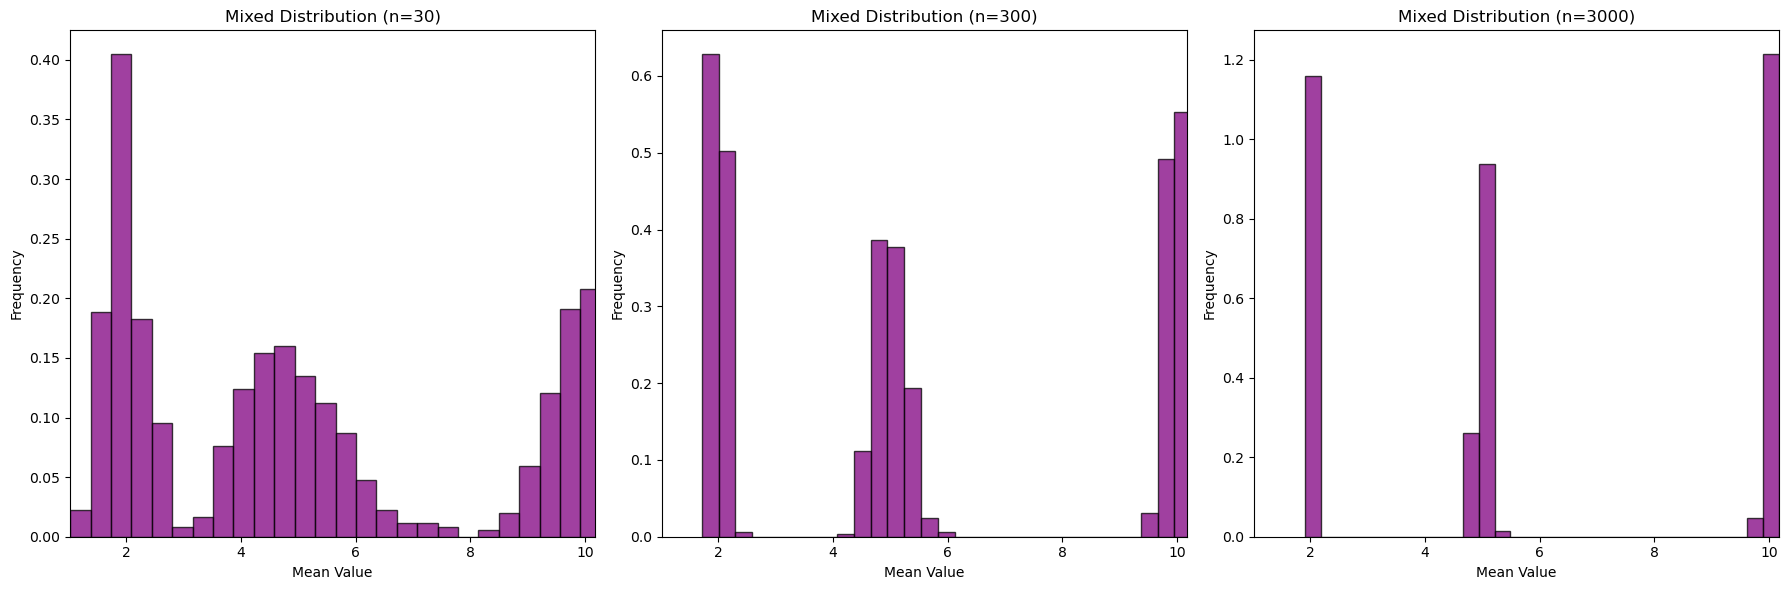

In [5]:
def generate_mixed_sample_means(sample_size, num_samples):
    sample_means = []
    distributions = ['poisson', 'exponential', 'geometric']
    for _ in range(num_samples):
        dist = np.random.choice(distributions)
        if dist == 'poisson':
            samples = np.random.poisson(poisson_lambda, sample_size)
        elif dist == 'exponential':
            samples = np.random.exponential(1/exponential_lambda, sample_size)
        elif dist == 'geometric':
            samples = np.random.geometric(geometric_p, sample_size)
        sample_means.append(np.mean(samples))
    return sample_means

mixed_means = {size: generate_mixed_sample_means(size, num_samples) for size in sample_sizes}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, size in enumerate(sample_sizes):
    mixed_mean, mixed_std = calculate_statistics(mixed_means[size])
    x = np.linspace(min(mixed_means[size]), max(mixed_means[size]), 100)
    axs[i].hist(mixed_means[size], bins=30, alpha=0.75, color='purple', edgecolor='black', density=True)
    axs[i].set_title(f'Mixed Distribution (n={size})')
    axs[i].set_xlim([min(mixed_means[30]), max(mixed_means[3000])])
    axs[i].set_xlabel('Mean Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### As we can see, as the number of samples increases, the graph shows the mean of all three distributions more accurately, and the corresponding graph is moving away from the normal distribution graph.

In [6]:
for size in sample_sizes:
    mean, std = calculate_statistics(mixed_means[size])
    print(f"Sample Size: {size}")
    print(f"Mean: {mean:.4f}")
    print(f"Standard Deviation: {std:.4f}")
    print()

Sample Size: 30
Mean: 5.6909
Standard Deviation: 3.3669

Sample Size: 300
Mean: 5.6900
Standard Deviation: 3.3257

Sample Size: 3000
Mean: 5.7747
Standard Deviation: 3.3073



### Part 6:

------------

#### $\text{Mean} = \frac{\text{Poisson's mean} + \text{Exponential's mean} + \text{Geometric's mean}}{3}\$

#### $\text{Standard Deviation} = \sqrt{\frac{\text{Poisson's mean}^2 + \text{Exponential's mean}^2 + \text{Geometric's mean}^2}{3} - \text{Mean}^2}\$

In [7]:
import math

poisson_mean = poisson_lambda
exponential_mean = 1 / exponential_lambda
geometric_mean = 1 / geometric_p

mean = (poisson_mean + exponential_mean + geometric_mean) / 3

variance = (poisson_mean**2 + exponential_mean**2 + geometric_mean**2) / 3 - mean**2
std_dev = math.sqrt(variance)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")

Mean: 5.666666666666667
Standard Deviation: 3.299831645537221


### Part 7:

-----------

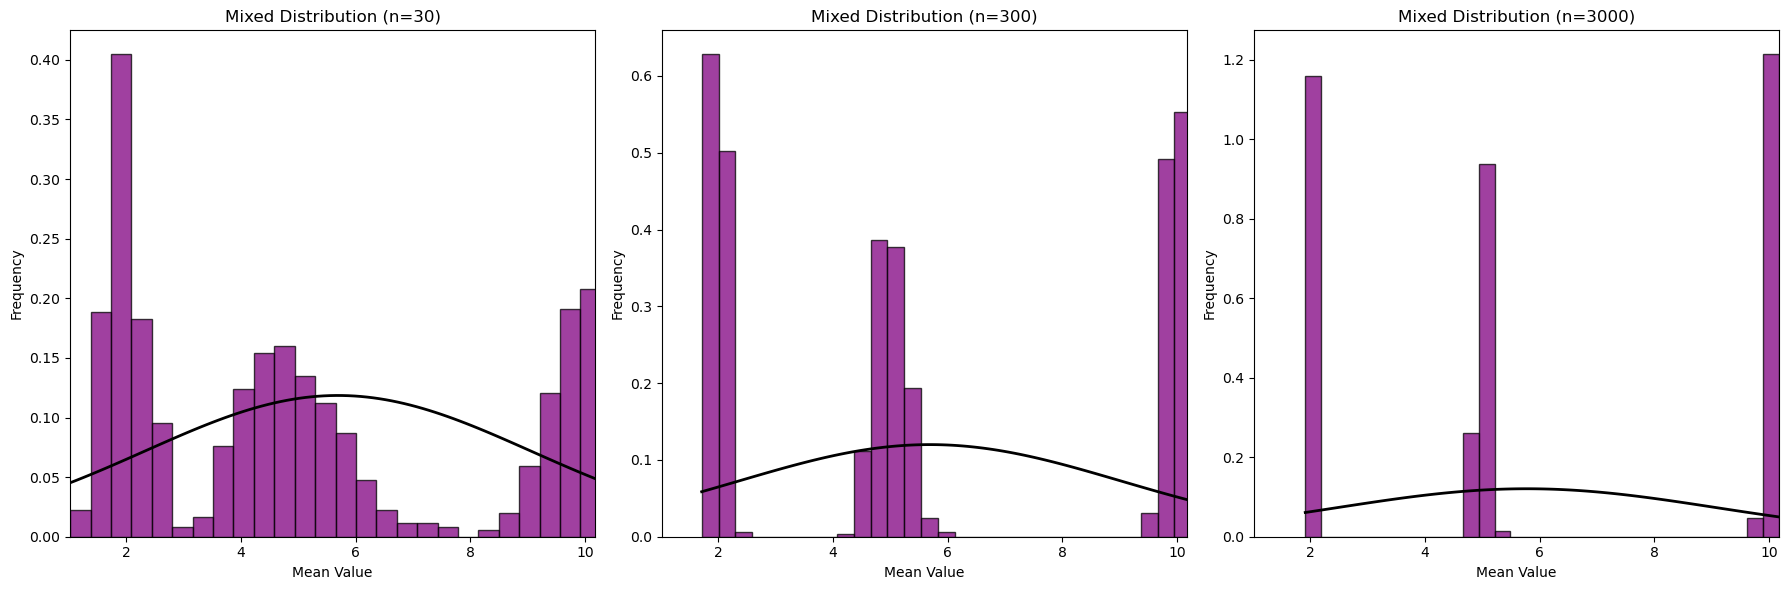

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, size in enumerate(sample_sizes):
    mean, std = calculate_statistics(mixed_means[size])
    x = np.linspace(min(mixed_means[size]), max(mixed_means[size]), 100)
    y = norm.pdf(x, mean, std)
    axs[i].hist(mixed_means[size], bins=30, alpha=0.75, color='purple', edgecolor='black', density=True)
    axs[i].plot(x, y, 'k-', linewidth=2)
    axs[i].set_title(f'Mixed Distribution (n={size})')
    axs[i].set_xlim([min(mixed_means[30]), max(mixed_means[3000])])
    axs[i].set_xlabel('Mean Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### The distributions resulting from Section 4 are jointly normal, and the central limit theorem states that as the number of samples increases, the final random variable becomes closer and closer to normal and its variance becomes smaller. But this only happens when the random variables are iid.

#### $\text{If } X_1, X_2, \dots, X_n \text{ are i.i.d. random variables with mean } \mu \text{ and variance } \sigma^2, \text{ then:}$

#### $\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$

#### And

#### $\frac{\sum_{i=1}^{n} X_i - n\mu}{\sqrt{n\sigma^2}} \sim N(0, 1) \quad \text{for } n \to \infty$